#Ekstraksi Dokumen
---

In [1]:
!pip install requests beautifulsoup4

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Inisialisasi list untuk menyimpan data dari semua halaman
all_data = []

# Jumlah halaman yang ingin di-crawl
total_pages = 1

# Looping untuk mengambil judul dan isi konten berita dari setiap halaman
for page in range(1, total_pages + 1):
    # URL target dengan nomor halaman
    url = f"https://news.detik.com/indeks/{page}"

    # Mengirim permintaan HTTP GET ke URL
    response = requests.get(url)

    # Memeriksa apakah permintaan berhasil
    if response.status_code == 200:
        # Parsing HTML dengan BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Cari semua elemen <h3> dengan class 'media__title'
        judul_berita_elements = soup.find_all('h3', class_='media__title')

        # Looping untuk mengambil judul dan isi konten dari setiap berita
        for judul_element in judul_berita_elements:
            # Mengambil judul berita
            judul_berita = judul_element.text.strip()

            # Mengambil URL selengkapnya
            selengkapnya_link = judul_element.find('a')['href']

            # Mengirim permintaan HTTP GET ke halaman selengkapnya
            selengkapnya_response = requests.get(selengkapnya_link)
            if selengkapnya_response.status_code == 200:
                selengkapnya_soup = BeautifulSoup(selengkapnya_response.text, 'html.parser')
                # Mencari dan mengambil isi konten berita
                isi_berita_elements = selengkapnya_soup.find_all('div', class_='detail__body-text')
                isi_berita = "\n".join([elem.text.strip() for elem in isi_berita_elements])
            else:
                isi_berita = "Tidak dapat mengambil berita"

            # Menambahkan data ke list
            all_data.append([judul_berita] + [isi_berita])

    else:
        print(f"Gagal mengambil halaman {url}, kode status: {response.status_code}")

# Membuat DataFrame dari list data
berita_online = pd.DataFrame(all_data, columns=["Judul Berita", "Isi Berita"])

In [3]:
berita_online

,Judul Berita,Isi Berita
0,Polres Jakpus Terima Laporan Penipuan Modus Ju...,Jakarta - Polres Metro Jakarta Pusat (Jakpus) ...
1,"Ada Konser Coldplay, Lalin Bundaran HI Arah GB...",Jakarta - Lalu lintas (lalin) dari Bundaran Ho...
2,Demo Tolak Coldplay di GBK Ricuh!,Massa mengatasnamakan Geranati LGBT menggelar ...
3,Desa Berdaya Perangi Sampah Jogja,
4,Masriah Kembali Mangkir Sidang Kasus Buang Sam...,Jakarta - Masriah kembali mangkir di sidang ka...
5,China Dituduh Jadi Dalang Peretasan yang Diala...,Jakarta - Semakin banyak warga Australia melap...
6,MUI: Daftar Produk untuk Diboikot yang Beredar...,Jakarta - Majelis Ulama Indonesia (MUI) tidak...
7,Israel Klaim Gelar 'Operasi Tepat Sasaran' Mem...,"Jakarta - Militer Pasukan Pertahanan Israel, I..."
8,"6 Tempat Parkir Konser Coldplay di Jakarta, Ce...",Jakarta - Kawasan Gelora Bung Karno (GBK) ditu...
9,"Hilang 10 Hari, Mahasiswa UPN Yogya Ditemukan ...","Jakarta - Annisa Dewi Kartika Sari (18), mahas..."


#Bentuk TF-IDF isi berita

In [4]:
#Mengambil 5 data sebagai contoh
data = berita_online['Isi Berita'].head(5)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Mengubah teks berita menjadi vektor TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Membuat DataFrame untuk hasil TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


#Kosinus similaritas

In [6]:
df_tfidf

,10,11,15,2013,2023,50,ada,advertisement,agar,air,...,untuk,viral,volume,wanita,warga,winarti,with,wiwik,wnv,yang
0,0.000000,0.044183,0.044183,0.000000,0.044183,0.000000,0.065973,0.044183,0.000000,0.000000,...,0.000000,0.065973,0.00000,0.065973,0.00000,0.000000,0.044183,0.000000,0.065973,0.088366
1,0.039388,0.032695,0.032695,0.000000,0.032695,0.000000,0.000000,0.032695,0.000000,0.000000,...,0.000000,0.000000,0.04882,0.000000,0.04882,0.000000,0.032695,0.000000,0.000000,0.032695
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.034711,0.086440,0.057627,0.043024,0.057627,0.043024,0.000000,0.028813,0.043024,0.043024,...,0.043024,0.000000,0.00000,0.000000,0.00000,0.086047,0.028813,0.215118,0.000000,0.028813


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Menghitung matriks similarity
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Membuat DataFrame untuk similarity matrix
df_similarity = pd.DataFrame(similarity_matrix, columns=range(1, len(data) + 1), index=range(1, len(data) + 1))


In [8]:
# Menampilkan similarity matrix
print("Similarity Matrix:")
df_similarity

Similarity Matrix:


,1,2,3,4,5
1,1.000000,0.187445,0.093451,0.0,0.113034
2,0.187445,1.000000,0.091315,0.0,0.084688
3,0.093451,0.091315,1.000000,0.0,0.025255
4,0.000000,0.000000,0.000000,0.0,0.000000
5,0.113034,0.084688,0.025255,0.0,1.000000


#Graph

In [9]:
!pip install networkx matplotlib

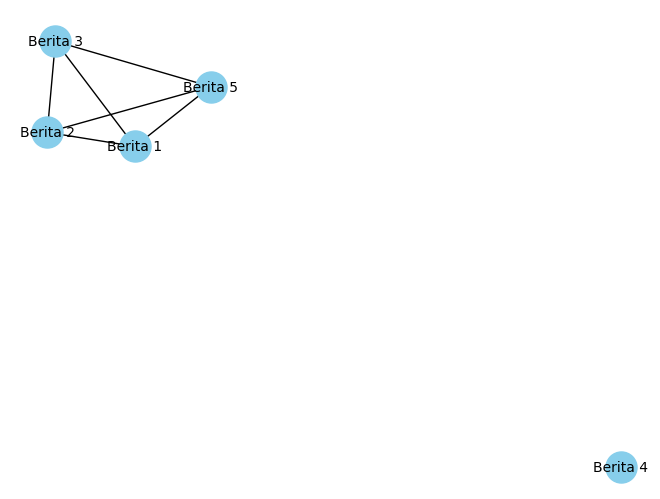

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Mengatur label pada node
labels = {i: f"Berita {i}" for i in G.nodes}

# Membuat posisi node (gunakan salah satu algoritma posisi, misalnya spring_layout)
pos = nx.spring_layout(G)

# Menggambar graf
nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='skyblue', font_size=10, font_color='black')

# Menampilkan graf
plt.show()


#Closeness Centrality

In [11]:
import networkx as nx

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menampilkan closeness centrality dari setiap node
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

Node 5: Closeness Centrality = 0.75
Node 4: Closeness Centrality = 0.0
Node 3: Closeness Centrality = 0.75
Node 2: Closeness Centrality = 0.75
Node 1: Closeness Centrality = 0.75


In [12]:
import networkx as nx

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menghitung PageRank
pagerank = nx.pagerank(G)

# Menghitung eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Menambahkan closeness centrality, pagerank, dan eigenvector centrality ke setiap node
for node, centrality in closeness_centrality.items():
    G.nodes[node]['Closeness Centrality'] = centrality
    G.nodes[node]['PageRank'] = pagerank[node]
    G.nodes[node]['Eigenvector Centrality'] = eigenvector_centrality[node]

# Menampilkan closeness centrality, pagerank, dan eigenvector centrality dari setiap node
for node, data in G.nodes(data=True):
    closeness = data['Closeness Centrality']
    pagerank = data['PageRank']
    eigenvector = data['Eigenvector Centrality']
    print(f"Node {node}: Closeness Centrality = {closeness}, PageRank = {pagerank}, Eigenvector Centrality = {eigenvector}")


Node 5: Closeness Centrality = 0.75, PageRank = 0.23201176153670036, Eigenvector Centrality = 0.4999999999999837
Node 4: Closeness Centrality = 0.0, PageRank = 0.036144578313266576, Eigenvector Centrality = 2.559999999999917e-07
Node 3: Closeness Centrality = 0.75, PageRank = 0.23104145515774954, Eigenvector Centrality = 0.4999999999999837
Node 2: Closeness Centrality = 0.75, PageRank = 0.24825272094129852, Eigenvector Centrality = 0.4999999999999837
Node 1: Closeness Centrality = 0.75, PageRank = 0.2525494840509849, Eigenvector Centrality = 0.4999999999999837
